# Breast Cancer Diagnosis (Binary Classification)
Haryo Wicaksono (JI210023)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('data.csv')

In [2]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
dataset.shape

(569, 33)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# We drop the ID column
dataset.drop(columns=['id'], axis=1, inplace=True)

In [6]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(dataset['diagnosis'])
dataset['target'] = labels
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,target
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [8]:
dataset.drop(columns=['diagnosis'], axis=1, inplace=True)
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [9]:
# Delete unnamed feature
for column in dataset.columns:
    if "Unnamed" in column:
        dataset.drop(column, axis = 1, inplace=True)

In [10]:
dataset.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')

In [11]:
X = dataset[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean','fractal_dimension_mean',
                 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst']]

y = dataset['target']

In [12]:
# Checking for missing values
col_labels = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean','fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst','target'
             ]
dataset.columns = col_labels

In [13]:
for c in col_labels:
    no_missing = dataset[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
    else:
        print(c)
        print("No missing values")
        print(' ')

radius_mean
No missing values
 
texture_mean
No missing values
 
perimeter_mean
No missing values
 
area_mean
No missing values
 
smoothness_mean
No missing values
 
compactness_mean
No missing values
 
concavity_mean
No missing values
 
concave_points_mean
No missing values
 
symmetry_mean
No missing values
 
fractal_dimension_mean
No missing values
 
radius_se
No missing values
 
texture_se
No missing values
 
perimeter_se
No missing values
 
area_se
No missing values
 
smoothness_se
No missing values
 
compactness_se
No missing values
 
concavity_se
No missing values
 
concave points_se
No missing values
 
symmetry_se
No missing values
 
fractal_dimension_se
No missing values
 
radius_worst
No missing values
 
texture_worst
No missing values
 
perimeter_worst
No missing values
 
area_worst
No missing values
 
smoothness_worst
No missing values
 
compactness_worst
No missing values
 
concavity_worst
No missing values
 
concave points_worst
No missing values
 
symmetry_worst
No missin

In [14]:
# alternate method to check for missing values
dataset.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

In [15]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [16]:
dataset.groupby('target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [17]:
dataset['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

C:\Users\harwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


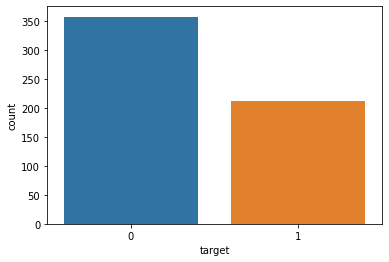

In [18]:
sns.countplot(dataset['target'],label="Sum")

plt.show()

C:\Users\harwi\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


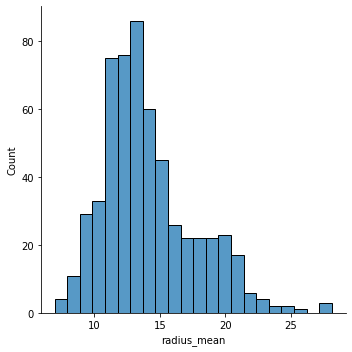

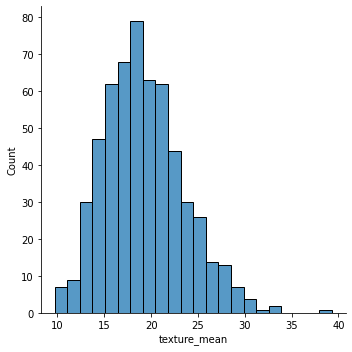

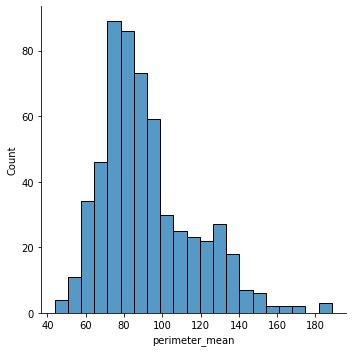

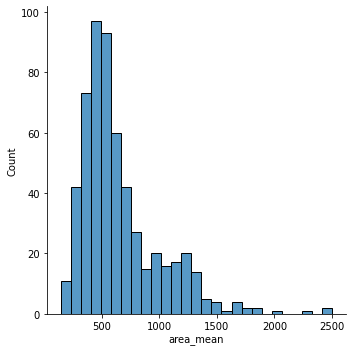

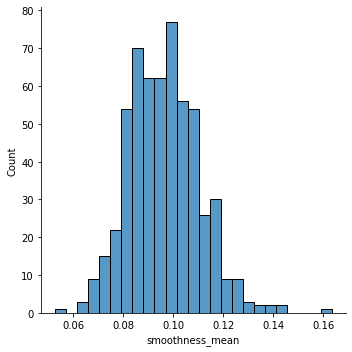

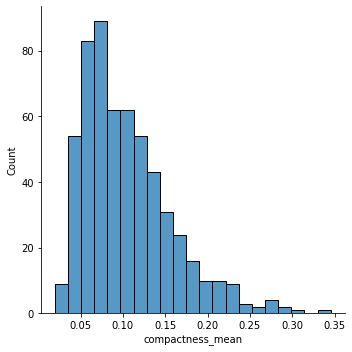

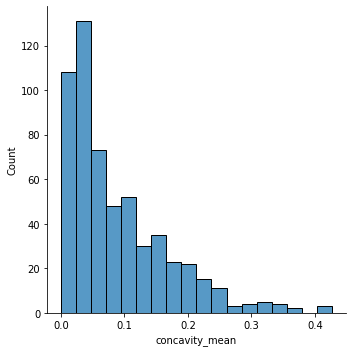

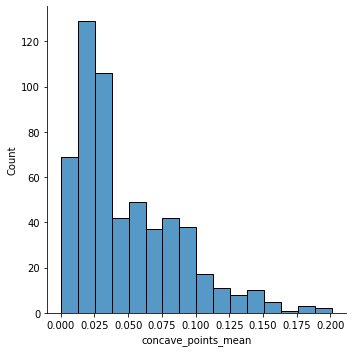

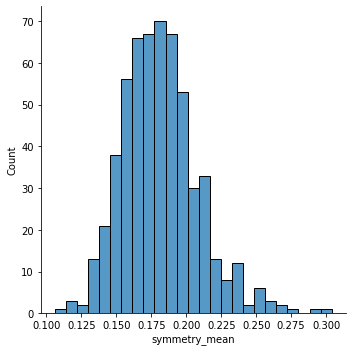

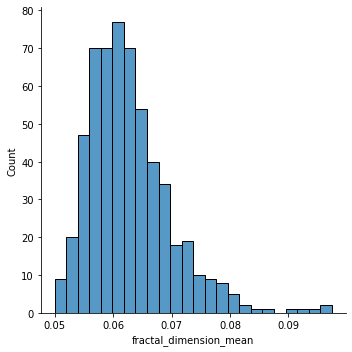

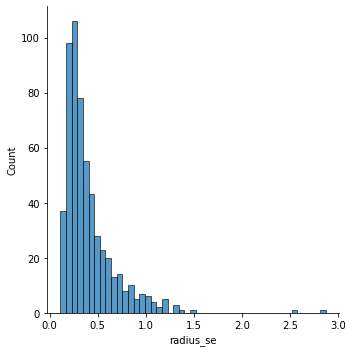

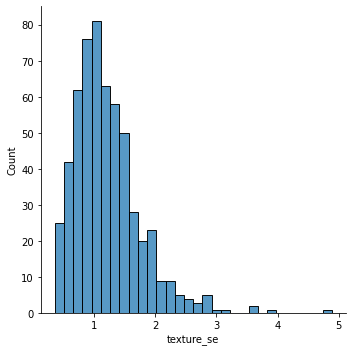

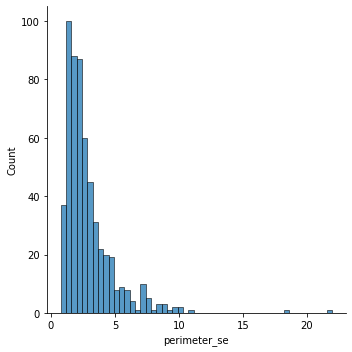

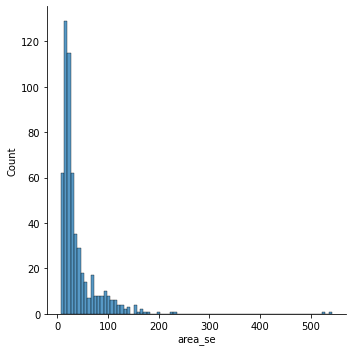

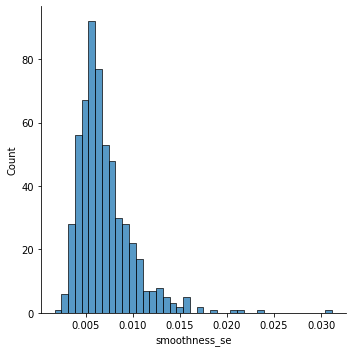

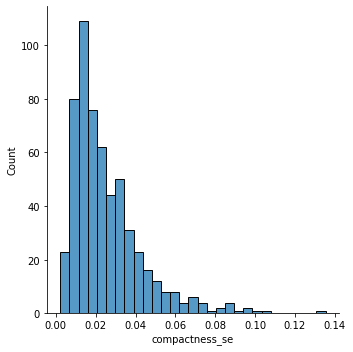

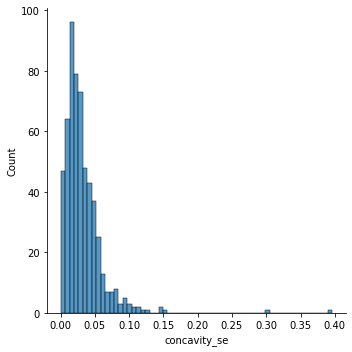

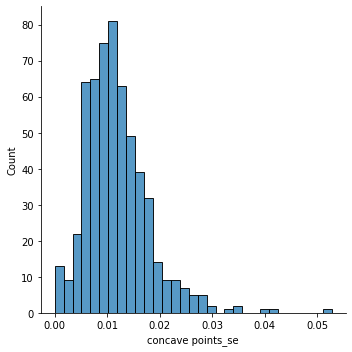

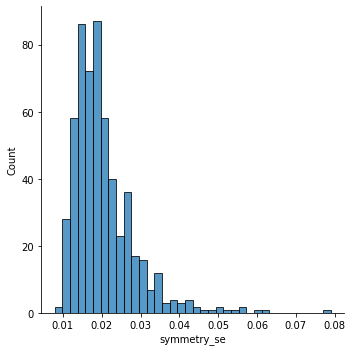

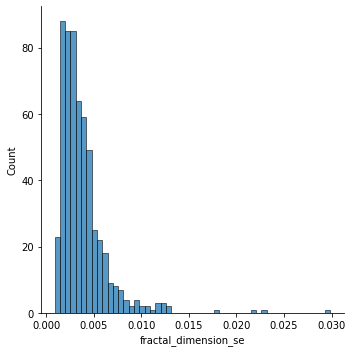

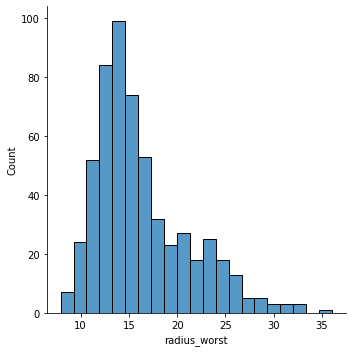

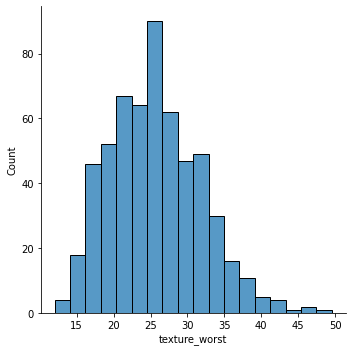

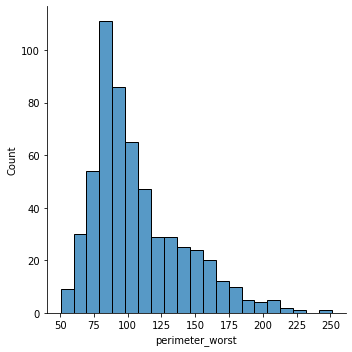

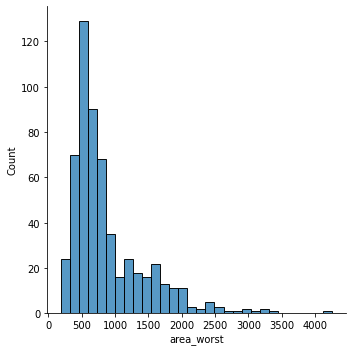

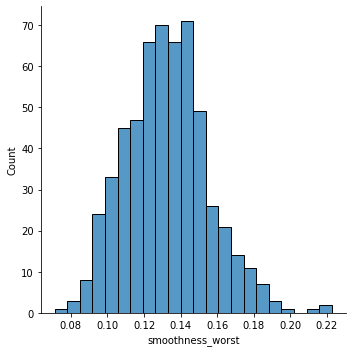

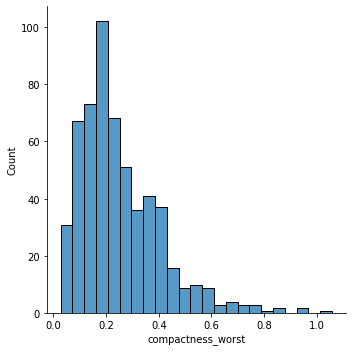

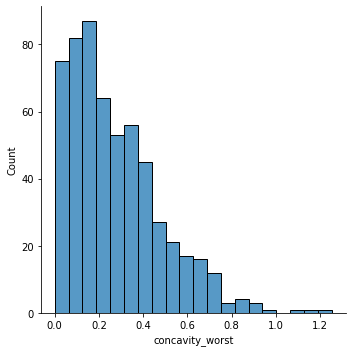

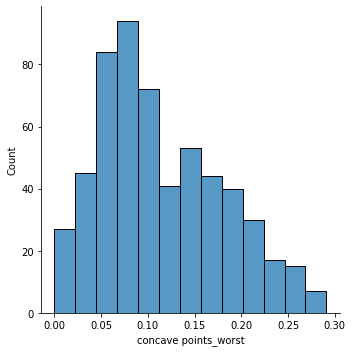

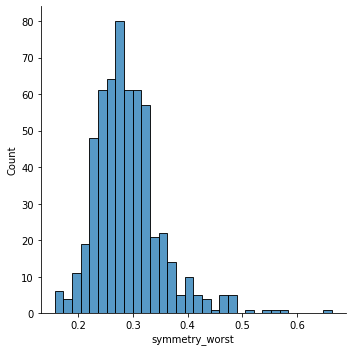

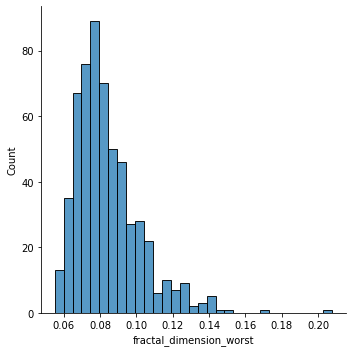

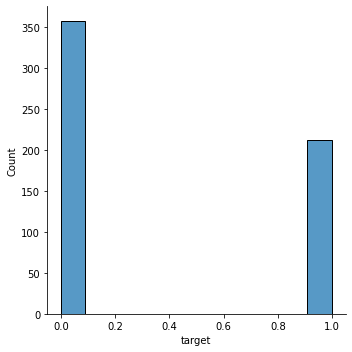

In [19]:
for column in dataset:
     sns.displot(x=column, data=dataset)

C:\Users\harwi\AppData\Local\Temp/ipykernel_3992/2894197882.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


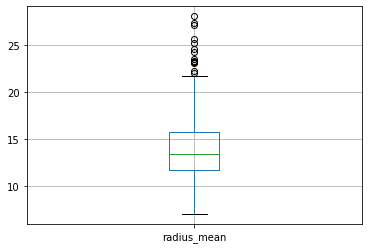

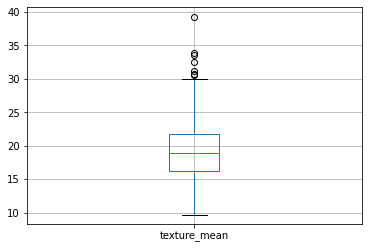

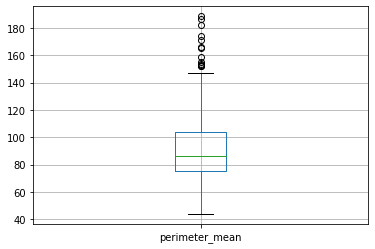

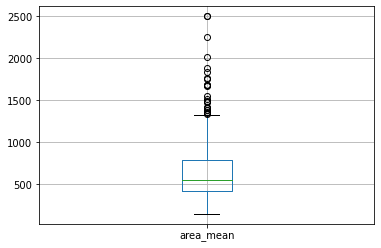

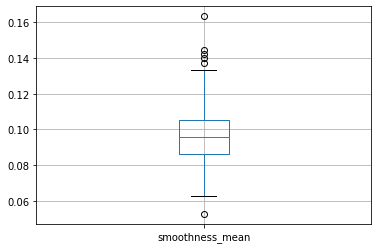

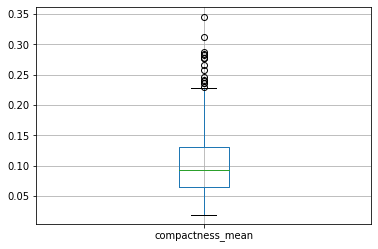

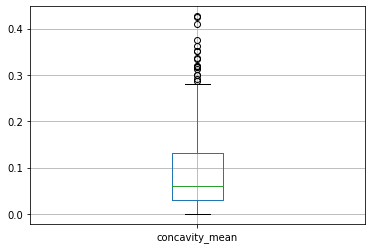

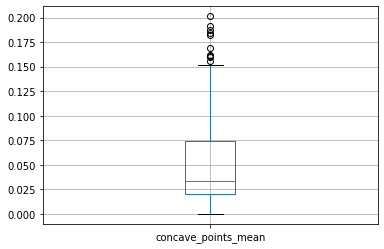

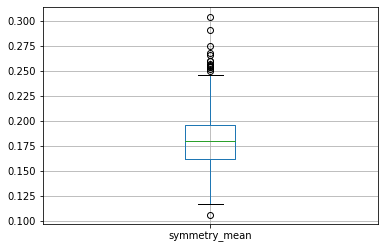

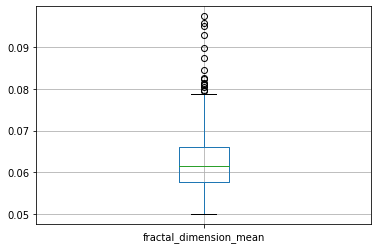

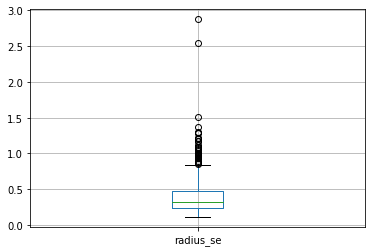

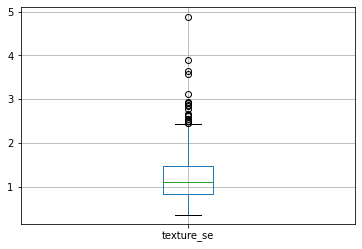

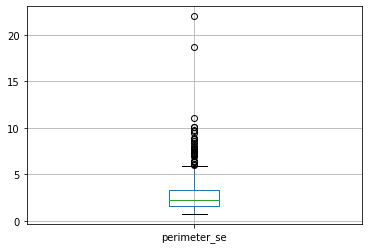

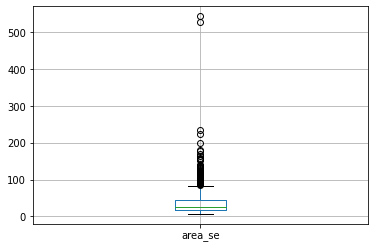

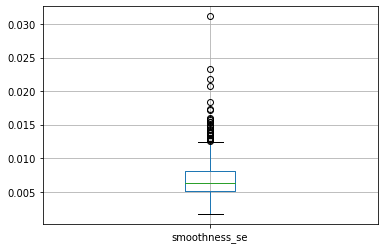

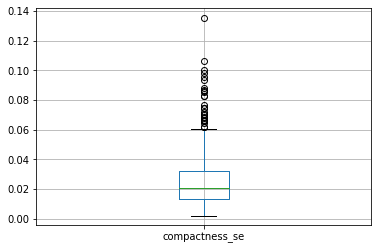

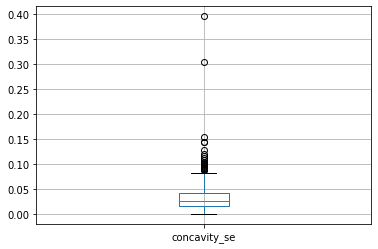

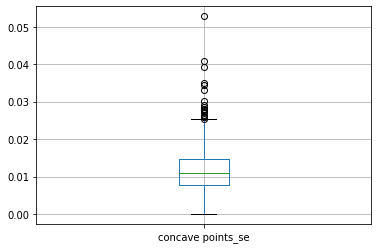

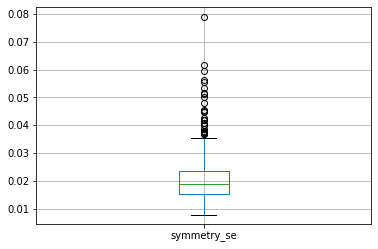

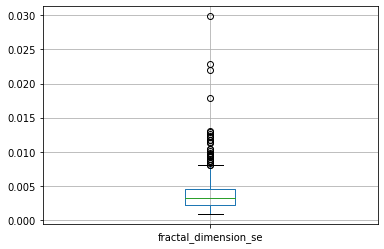

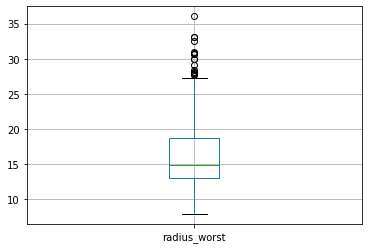

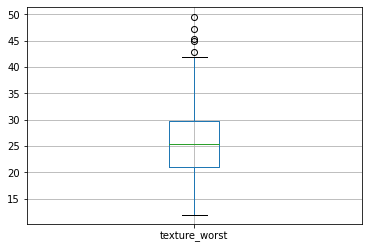

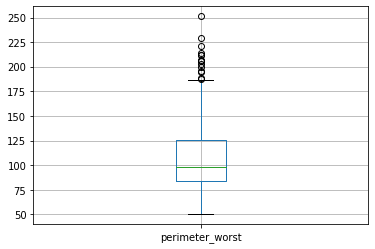

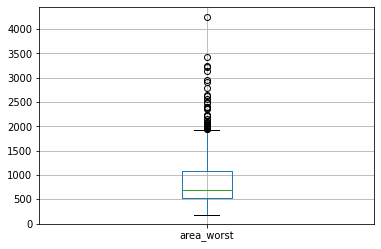

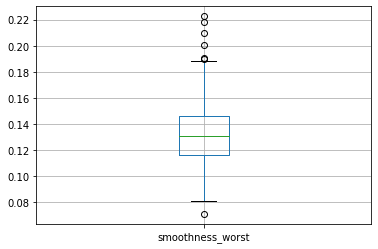

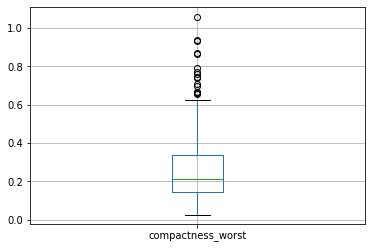

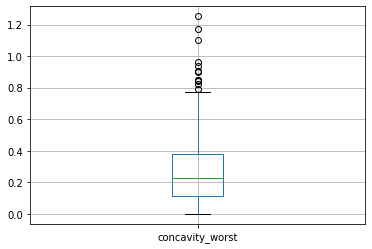

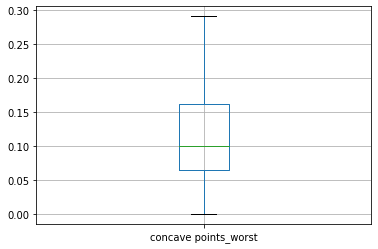

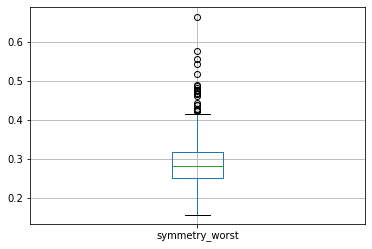

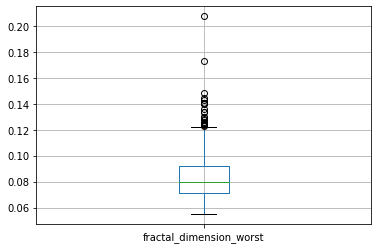

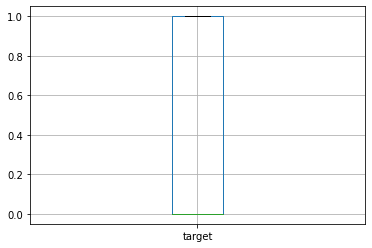

In [20]:
for column in dataset:
   plt.figure()
   dataset.boxplot([column])

In [21]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
column_names = dataset.columns
df = scaler.fit_transform(dataset)
scaled_df = pd.DataFrame(df, columns=column_names)
scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0


In [22]:
# Target feature gets label encoded back after being changed to a float data type
labels = label_encode.fit_transform(dataset['target'])
dataset['target'] = labels
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# Dimensionality Reduction / Feature Selection (Using Correlation Coefficient)

C:\Users\harwi\AppData\Local\Temp/ipykernel_3992/3048971439.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


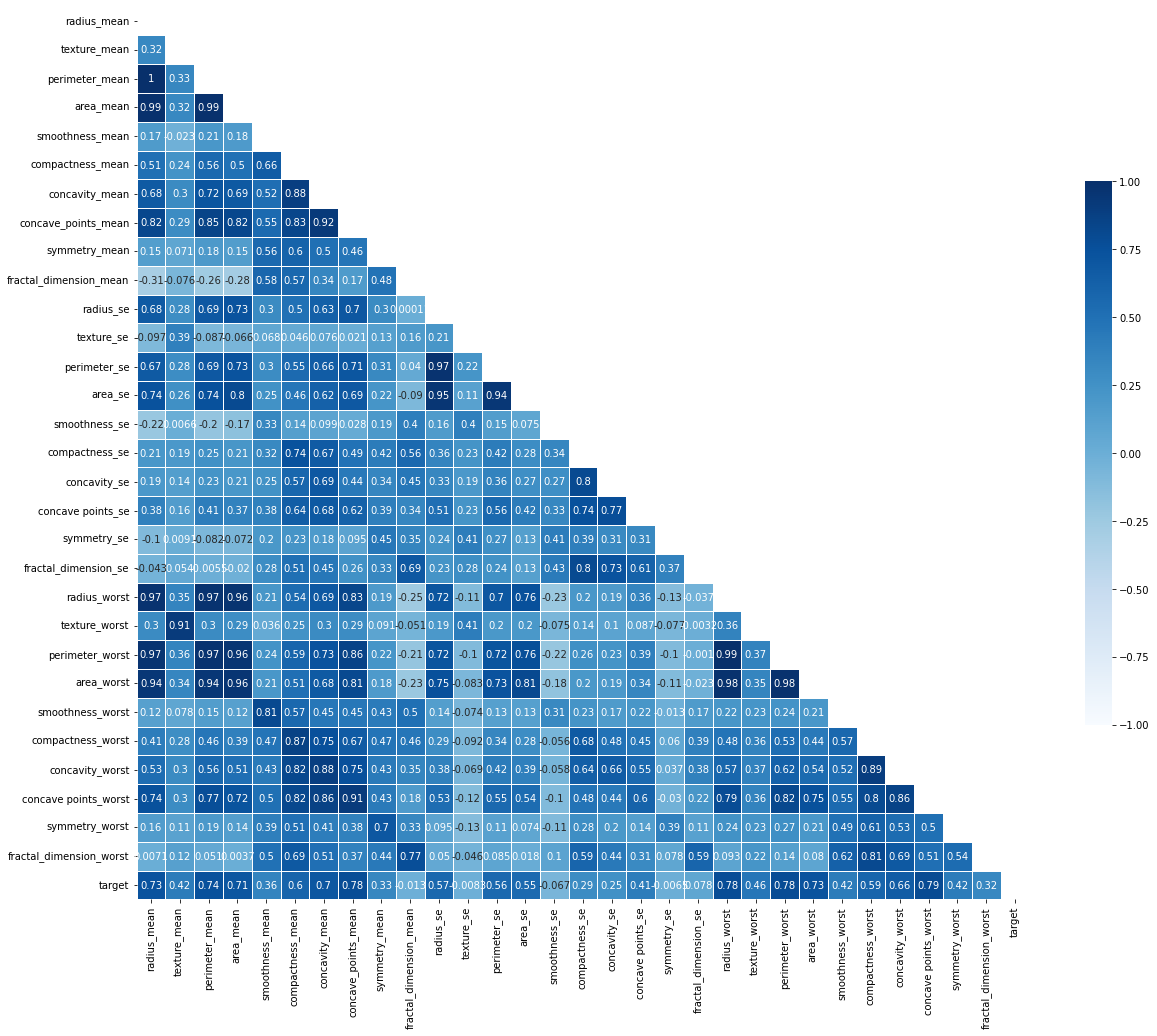

In [24]:
correlation = dataset.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap='Blues', vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [25]:
# Picked input features which correlates with target feature in the range of 0.5 to 0.9
X_corr = dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 
                    'concave_points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 
                    'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']]
y_corr = dataset['target']

C:\Users\harwi\AppData\Local\Temp/ipykernel_3992/1106173389.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


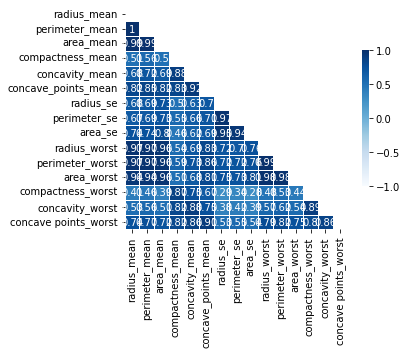

In [26]:
correlation = X_corr.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap='Blues', vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [28]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

C:\Users\harwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\harwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: AUROC = 0.990


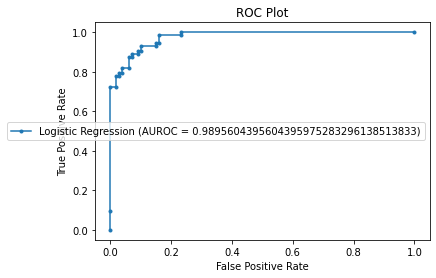

In [29]:
LR.fit(X_train, y_train)
LR_probs = LR.predict_proba(X_test)
LR_probs = LR_probs[:, 1]
print('Logistic Regression: AUROC = %.3f' % (LR_roc))
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)

plt.plot(LR_fpr, LR_tpr, marker='.', label='Logistic Regression (AUROC = %0.34f)' % LR_roc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [30]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

Decision Tree: AUROC = 0.910


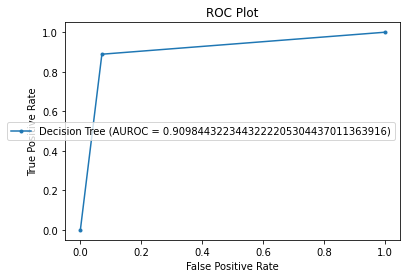

In [31]:
decision_tree.fit(X_train, y_train)
decision_tree_probs = decision_tree.predict_proba(X_test)
decision_tree_probs = decision_tree_probs[:, 1]
print('Decision Tree: AUROC = %.3f' % (dtree_roc))
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probs)

plt.plot(decision_tree_fpr, decision_tree_tpr, marker='.', label='Decision Tree (AUROC = %0.34f)' % dtree_roc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [32]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

SVM: AUROC = 0.983


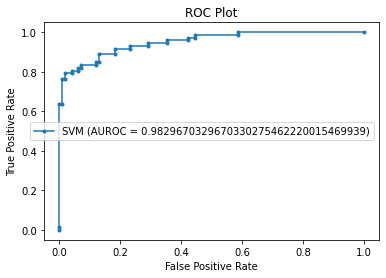

In [33]:
SVM.fit(X_train, y_train)
SVM_probs = SVM.predict_proba(X_test)
SVM_probs = SVM_probs[:, 1]
print('SVM: AUROC = %.3f' % (SVM_roc))
SVM_fpr, SVM_tpr, _ = roc_curve(y_test, SVM_probs)

plt.plot(SVM_fpr, SVM_tpr, marker='.', label='SVM (AUROC = %0.34f)' % SVM_roc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [34]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

QDA: AUROC = 0.994


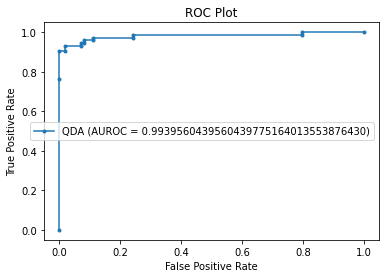

In [35]:
QDA.fit(X_train, y_train)
QDA_probs = QDA.predict_proba(X_test)
QDA_probs = QDA_probs[:, 1]
print('QDA: AUROC = %.3f' % (QDA_roc))
QDA_fpr, QDA_tpr, _ = roc_curve(y_test, QDA_probs)

plt.plot(QDA_fpr, QDA_tpr, marker='.', label='QDA (AUROC = %0.34f)' % QDA_roc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [36]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

random_forest: AUROC = 0.992


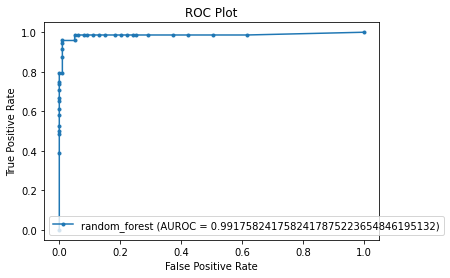

In [37]:
random_forest.fit(X_train, y_train)
random_forest_probs = random_forest.predict_proba(X_test)
random_forest_probs = random_forest_probs[:, 1]
print('random_forest: AUROC = %.3f' % (forest_roc))
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs)

plt.plot(random_forest_fpr, random_forest_tpr, marker='.', label='random_forest (AUROC = %0.34f)' % forest_roc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [38]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

KNN: AUROC = 0.966


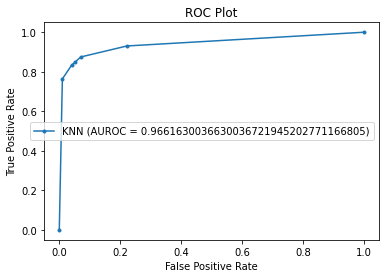

In [39]:
KNN.fit(X_train, y_train)
KNN_probs = KNN.predict_proba(X_test)
KNN_probs = KNN_probs[:, 1]
print('KNN: AUROC = %.3f' % (KNN_roc))
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)

plt.plot(KNN_fpr, KNN_tpr, marker='.', label='KNN (AUROC = %0.34f)' % KNN_roc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [40]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

bayes: AUROC = 0.991


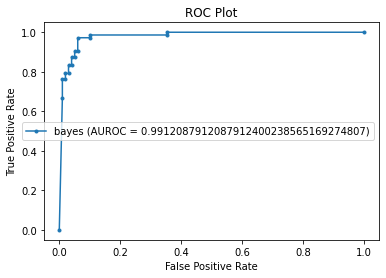

In [41]:
bayes.fit(X_train, y_train)
bayes_probs = bayes.predict_proba(X_test)
bayes_probs = bayes_probs[:, 1]
print('bayes: AUROC = %.3f' % (bayes_roc))
bayes_fpr, bayes_tpr, _ = roc_curve(y_test, bayes_probs)

plt.plot(bayes_fpr, bayes_tpr, marker='.', label='bayes (AUROC = %0.34f)' % bayes_roc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [42]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_correlation.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
4,Random Forest,0.296394,0.044779,0.972237,0.977510,0.965659,0.971562,0.991758
3,Quadratic Discriminant Analysis,0.004997,0.009050,0.962368,0.964873,0.957967,0.961965,0.993956
0,Logistic Regression,0.076576,0.011378,0.957237,0.961372,0.949176,0.956684,0.989560
6,Bayes,0.007349,0.022981,0.944605,0.951352,0.932967,0.943350,0.991209
5,K-Nearest Neighbors,0.004794,0.020285,0.939737,0.945863,0.928961,0.938458,0.966163
2,Support Vector Machine,0.026772,0.009170,0.924605,0.938676,0.902587,0.921877,0.982967
1,Decision Tree,0.008591,0.010367,0.916974,0.911555,0.909844,0.916028,0.909844


In [43]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    }, columns = ['Model', 'Accuracy'])

models_correlation.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,Random Forest,0.972237
3,Quadratic Discriminant Analysis,0.962368
0,Logistic Regression,0.957237
6,Bayes,0.944605
5,K-Nearest Neighbors,0.939737
2,Support Vector Machine,0.924605
1,Decision Tree,0.916974


In [44]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    }, columns = ['Model', 'Fitting time'])

models_correlation.sort_values(by='Fitting time', ascending=False)

,Model,Fitting time
4,Random Forest,0.296394
0,Logistic Regression,0.076576
2,Support Vector Machine,0.026772
1,Decision Tree,0.008591
6,Bayes,0.007349
3,Quadratic Discriminant Analysis,0.004997
5,K-Nearest Neighbors,0.004794


In [45]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    }, columns = ['Model', 'Scoring time'])

models_correlation.sort_values(by='Scoring time', ascending=False)

,Model,Scoring time
4,Random Forest,0.044779
6,Bayes,0.022981
5,K-Nearest Neighbors,0.020285
0,Logistic Regression,0.011378
1,Decision Tree,0.010367
2,Support Vector Machine,0.009170
3,Quadratic Discriminant Analysis,0.009050


In [46]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    }, columns = ['Model', 'Precision'])

models_correlation.sort_values(by='Precision', ascending=False)

,Model,Precision
4,Random Forest,0.977510
3,Quadratic Discriminant Analysis,0.964873
0,Logistic Regression,0.961372
6,Bayes,0.951352
5,K-Nearest Neighbors,0.945863
2,Support Vector Machine,0.938676
1,Decision Tree,0.911555


In [47]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    }, columns = ['Model', 'Recall'])

models_correlation.sort_values(by='Recall', ascending=False)

,Model,Recall
4,Random Forest,0.965659
3,Quadratic Discriminant Analysis,0.957967
0,Logistic Regression,0.949176
6,Bayes,0.932967
5,K-Nearest Neighbors,0.928961
1,Decision Tree,0.909844
2,Support Vector Machine,0.902587


In [48]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    }, columns = ['Model', 'F1_score'])

models_correlation.sort_values(by='F1_score', ascending=False)

,Model,F1_score
4,Random Forest,0.971562
3,Quadratic Discriminant Analysis,0.961965
0,Logistic Regression,0.956684
6,Bayes,0.943350
5,K-Nearest Neighbors,0.938458
2,Support Vector Machine,0.921877
1,Decision Tree,0.916028


In [49]:
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'AUC_ROC'])

models_correlation.sort_values(by='AUC_ROC', ascending=False)

,Model,AUC_ROC
3,Quadratic Discriminant Analysis,0.993956
4,Random Forest,0.991758
6,Bayes,0.991209
0,Logistic Regression,0.989560
2,Support Vector Machine,0.982967
5,K-Nearest Neighbors,0.966163
1,Decision Tree,0.909844


C:\Users\harwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: AUROC = 0.990
Decision Tree: AUROC = 0.910
SVM: AUROC = 0.983
QDA: AUROC = 0.994
random_forest: AUROC = 0.992
bayes: AUROC = 0.991
KNN: AUROC = 0.966


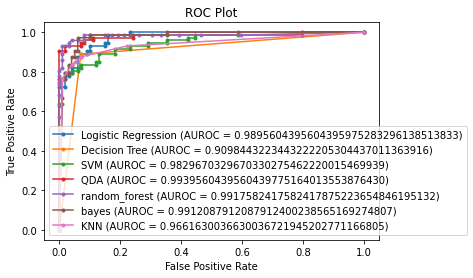

In [50]:
LR.fit(X_train, y_train)
LR_probs = LR.predict_proba(X_test)
LR_probs = LR_probs[:, 1]
print('Logistic Regression: AUROC = %.3f' % (LR_roc))
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
plt.plot(LR_fpr, LR_tpr, marker='.', label='Logistic Regression (AUROC = %0.34f)' % LR_roc)

decision_tree.fit(X_train, y_train)
decision_tree_probs = decision_tree.predict_proba(X_test)
decision_tree_probs = decision_tree_probs[:, 1]
print('Decision Tree: AUROC = %.3f' % (dtree_roc))
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probs)
plt.plot(decision_tree_fpr, decision_tree_tpr, marker='.', label='Decision Tree (AUROC = %0.34f)' % dtree_roc)

SVM.fit(X_train, y_train)
SVM_probs = SVM.predict_proba(X_test)
SVM_probs = SVM_probs[:, 1]
print('SVM: AUROC = %.3f' % (SVM_roc))
SVM_fpr, SVM_tpr, _ = roc_curve(y_test, SVM_probs)
plt.plot(SVM_fpr, SVM_tpr, marker='.', label='SVM (AUROC = %0.34f)' % SVM_roc)

QDA.fit(X_train, y_train)
QDA_probs = QDA.predict_proba(X_test)
QDA_probs = QDA_probs[:, 1]
print('QDA: AUROC = %.3f' % (QDA_roc))
QDA_fpr, QDA_tpr, _ = roc_curve(y_test, QDA_probs)
plt.plot(QDA_fpr, QDA_tpr, marker='.', label='QDA (AUROC = %0.34f)' % QDA_roc)

random_forest.fit(X_train, y_train)
random_forest_probs = random_forest.predict_proba(X_test)
random_forest_probs = random_forest_probs[:, 1]
print('random_forest: AUROC = %.3f' % (forest_roc))
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs)
plt.plot(random_forest_fpr, random_forest_tpr, marker='.', label='random_forest (AUROC = %0.34f)' % forest_roc)

bayes.fit(X_train, y_train)
bayes_probs = bayes.predict_proba(X_test)
bayes_probs = bayes_probs[:, 1]
print('bayes: AUROC = %.3f' % (bayes_roc))
bayes_fpr, bayes_tpr, _ = roc_curve(y_test, bayes_probs)
plt.plot(bayes_fpr, bayes_tpr, marker='.', label='bayes (AUROC = %0.34f)' % bayes_roc)

KNN.fit(X_train, y_train)
KNN_probs = KNN.predict_proba(X_test)
KNN_probs = KNN_probs[:, 1]
print('KNN: AUROC = %.3f' % (KNN_roc))
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
plt.plot(KNN_fpr, KNN_tpr, marker='.', label='KNN (AUROC = %0.34f)' % KNN_roc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()